# Lending Club - Case Study
#### Members:
1. Priyank Ukhale
2. Parthiban Srinivasan

#### Business Objectives
Identify the risky loan applicants and redue the bad loans thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In [1]:
# Import the required packages
# We need to import numpy , pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
# Load the data from loan.csv using pandas and store them in a dataframe called loan
loan = pd.read_csv('loan.csv',encoding = "ISO-8859-1",low_memory=False)

In [3]:
loan.shape
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


#### Data Cleaning

In [4]:
# Find the missing values in each column as a percentage of the total values
missing_values = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing_values.loc[missing_values > 0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

In [5]:
# Identify the columns with missing values which have more than 50% empty
columns_with_missing_values = list(missing_values[missing_values >= 50].index)

len(columns_with_missing_values)

57

In [6]:
# In the previous cell, we identified 57 columns which have more than 50% data missing.
# These columns provide not much useful insight to the data.
# We will remove these columns from the master data frame (loan)
loan = loan.drop(columns_with_missing_values,axis=1)
loan.shape

(39717, 54)

In [7]:
# Analyse the remaining columns again
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [8]:
# Drop some of these columns which are not useful for analysis

drop_columnlist = ['desc','collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan = loan.drop(drop_columnlist,axis=1)

In [9]:
loan.shape

(39717, 50)

In [10]:
#Remove all the records which have null values for title ,length, revol_tuil and last_payment date
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

In [11]:
loan.shape

(36433, 50)

In [12]:
loan.to_csv('loan_data_clean.csv', encoding='utf-8', index=False)

#### The data has been cleaned up and written to a file. Lets create another dataframe and populate it with the clean data

In [13]:
loan_df_clean = loan[:]
loan_df_clean.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

In [14]:
# From the data dictionary provided, we can still drop some of the columns
drop_cols = ['id','member_id','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
loan_df_clean= loan_df_clean.drop(drop_cols,axis=1)

In [15]:
loan_df_clean.shape

(36433, 40)

#### We have to standardize the data
#### There are 2 sets of data that can be standardized
1. Round of the digits for anything related to currency 
2. Get the dates in standard format

In [16]:
loan_df_clean.total_pymnt= round(loan_df_clean.total_pymnt,2)
loan_df_clean.total_rec_late_fee= round(loan_df_clean.total_rec_late_fee,2)
loan_df_clean.collection_recovery_fee= round(loan_df_clean.collection_recovery_fee,2)

In [17]:
# Identified the date time fields in the csv file
date_columns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
loan_df_clean[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
issue_d               36433 non-null object
earliest_cr_line      36433 non-null object
last_pymnt_d          36433 non-null object
last_credit_pull_d    36433 non-null object
dtypes: object(4)
memory usage: 1.4+ MB


In [18]:
# Convert these date fields to a standard date time format 
# Notice that these fields are just 'objects'
loan_df_clean.issue_d = pd.to_datetime(loan_df_clean.issue_d, format='%b-%y')
loan_df_clean.earliest_cr_line = pd.to_datetime(loan_df_clean.earliest_cr_line, format='%b-%y')
loan_df_clean.last_pymnt_d = pd.to_datetime(loan_df_clean.last_pymnt_d, format='%b-%y')
loan_df_clean.last_credit_pull_d = pd.to_datetime(loan_df_clean.last_credit_pull_d, format='%b-%y')

In [19]:
loan_df_clean[date_columns].info()
# Notice that the type of the objects are datetime64 now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
issue_d               36433 non-null datetime64[ns]
earliest_cr_line      36433 non-null datetime64[ns]
last_pymnt_d          36433 non-null datetime64[ns]
last_credit_pull_d    36433 non-null datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


In [20]:
# Remove duplicate rows
loan_df_clean=loan_df_clean.drop_duplicates()
loan_df_clean.shape

(36433, 40)

In [21]:
# Remove the '%' symbol from the fields
loan_df_clean['int_rate'] = loan_df_clean['int_rate'].str.strip('%').astype('float')
loan_df_clean['revol_util'] = loan_df_clean['revol_util'].str.strip('%').astype('float')

In [22]:
# Notice that these columns are now of type float
loan_df_clean[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 2 columns):
int_rate      36433 non-null float64
revol_util    36433 non-null float64
dtypes: float64(2)
memory usage: 853.9 KB


In [23]:
# we have to replace the employee length values to int
# Notice we also have values like <1 year and >10 years. These should be replaced with 0 and 10 respectively
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [24]:
loan_df_clean = loan_df_clean.replace({"emp_length": emp_length_dict })

In [25]:
# Simiarly the term column has the duration in months and the string 'months' in it. We can change that value to an int
loan_df_clean['term'] = loan_df_clean.term.apply(lambda x: x.split()[0])

In [26]:
loan_df_clean.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

In [27]:
# Split the date into month and year
loan_df_clean['earliest_cr_line_month'] = loan_df_clean['earliest_cr_line'].dt.month
loan_df_clean['earliest_cr_line_year'] = loan_df_clean['earliest_cr_line'].dt.year

In [28]:
len(loan_df_clean[loan_df_clean['earliest_cr_line_year'] > 2019 ])

50

In [29]:
# There are some records which have the cr line year beyond 2019
# This could be because the year 68 is interpreted as 2068. We will subtract 100 to such records 
loan_df_clean.loc[loan_df_clean['earliest_cr_line_year'] > 2019 , 'earliest_cr_line_year'] = loan_df_clean['earliest_cr_line_year'] - 100

In [30]:
loan_df_clean.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       6
1966       7
1967      12
1968      12
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
1988     671
1989     781
1990     944
1991     884
1992     970
1993    1398
1994    1860
1995    1974
1996    2074
1997    2271
1998    2645
1999    2763
2000    3034
2001    2363
2002    1794
2003    1740
2004    1639
2005    1406
2006    1079
2007     668
2008     144
Name: loan_amnt, dtype: int64

In [31]:
# Similarly split the issue_d field into month and year
loan_df_clean['issue_d_month'] = loan_df_clean['issue_d'].dt.month
loan_df_clean['issue_d_year'] = loan_df_clean['issue_d'].dt.year

In [32]:
# Write this data as the master data to a csv file
loan_df_clean.to_csv('master_loan.csv', encoding='utf-8', index=False)

#### Lets use this master data for further analysis

In [33]:
master_loan = loan_df_clean[:]
master_loan.shape

(36433, 44)

In [34]:
master_loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [35]:
# For our analysis we should not consider the loans which are active now. 
#We should consider the fully paid ones or the charged off loans

master_loan = master_loan[master_loan['loan_status'].isin(['Fully Paid','Charged Off'])]
master_loan.shape

(35367, 44)

#### Define functions for graphs
#### Some of these graph functions have been sourced from internet 

In [36]:
## Wonderful solution to show labels in bar plots - copied from https://stackoverflow.com/a/48372659 and edited
def showLabelsWithPC(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [37]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# (absolute numbers do not make sense -> category values can have very different absolute numbers)
# We want to see what are the chances of some category leading to loan default
# Absolute numbers are also printed to assess level of confidence in a % value. 
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [38]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [39]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (master_loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    #ax = master_loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (master_loan.loc[master_loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    showLabels(ax)

In [50]:
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [51]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        showLabels(ax)

    plt.tight_layout()

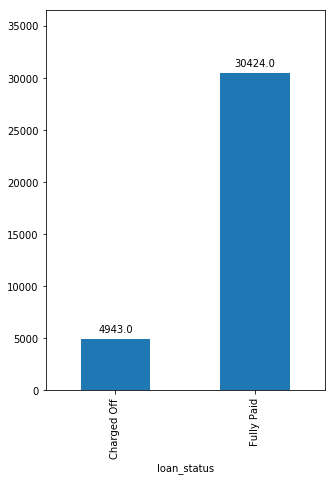

In [41]:
# Plot Graph based on loan status
plt.figure(figsize=(5,7))
ax = master_loan.groupby('loan_status').loan_amnt.count().plot.bar()
showLabels(ax)
plt.show()

In [42]:
print("%.2f" % (master_loan.loc[master_loan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(master_loan)))

13.98


Approximately 14% of the loans have been charged off from the total loans

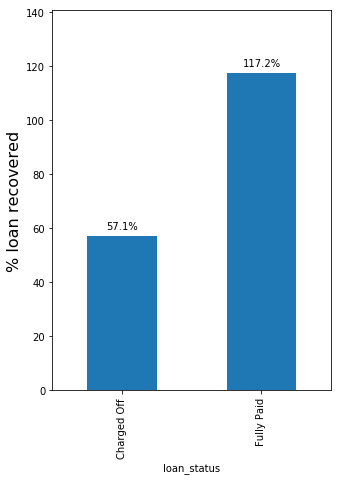

In [43]:
plt.figure(figsize=(5,7))
ax = (master_loan.groupby('loan_status').total_pymnt.sum() * 100 / master_loan.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
showLabelsWithPC(ax)

From the above Graph its evident that only 57% of the money has been recovered on the Charged off loans

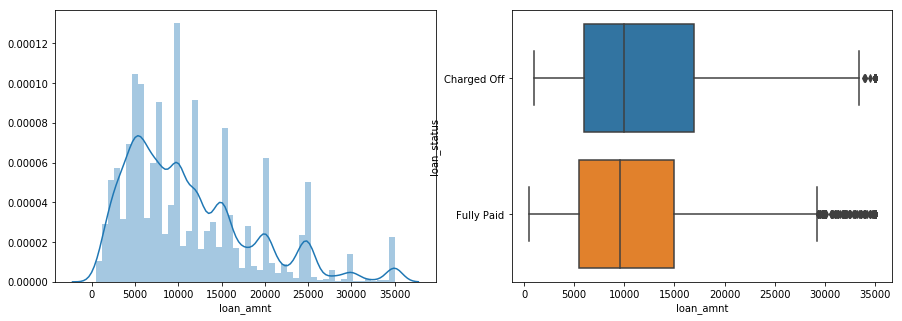

In [44]:
plot_distribution(master_loan, 'loan_amnt')

The mean and 25th percentile looks very similar for the charged off and the paid loans.
The mean is around 10K mark

In [45]:
master_loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


In [47]:
master_loan['loan_amnt_bin'] = pd.cut(master_loan['loan_amnt'], 
                                      [x for x in range(0, 40000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])


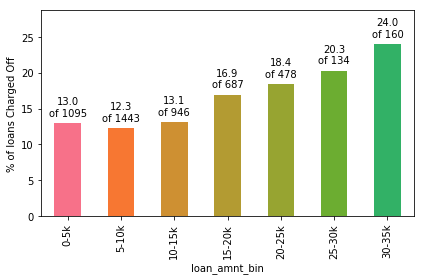

In [49]:
plotLoanStatus(master_loan, 'loan_amnt_bin')

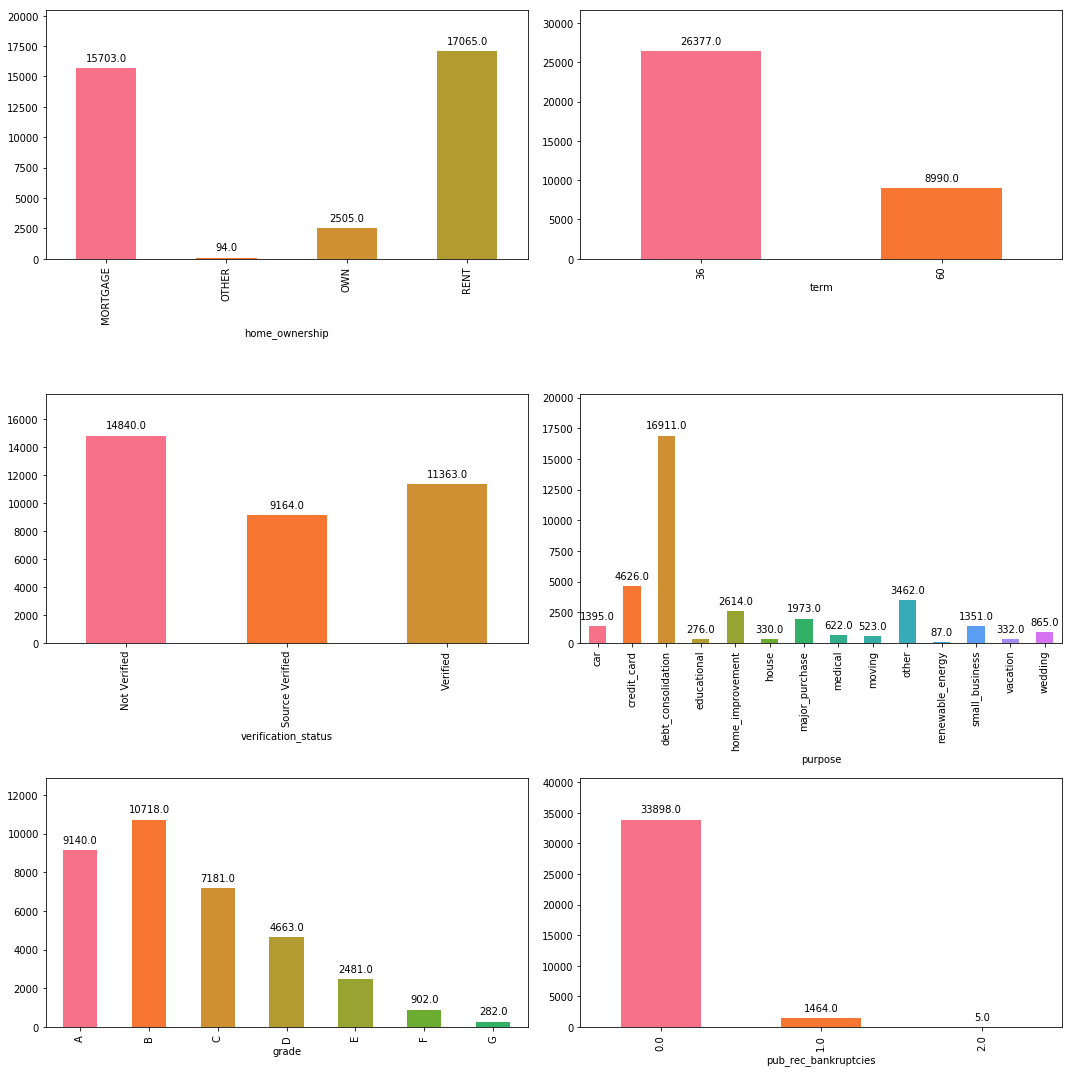

In [53]:
# Lets plot some graphs based on other categorical values
plt.figure(figsize=(15,15))

categoricalBarPlots(master_loan, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

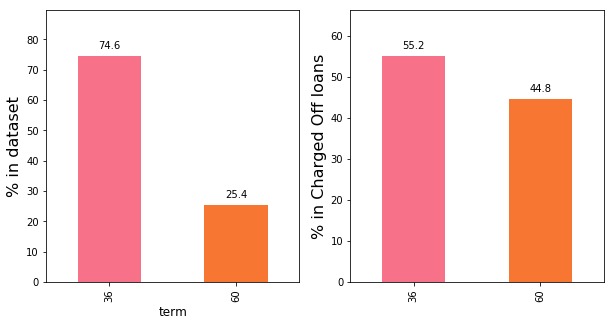

In [54]:
# Let us analyse the data based on the term of the loan
plt.figure(figsize=(10,5))
plot_percentages(master_loan, 'term')

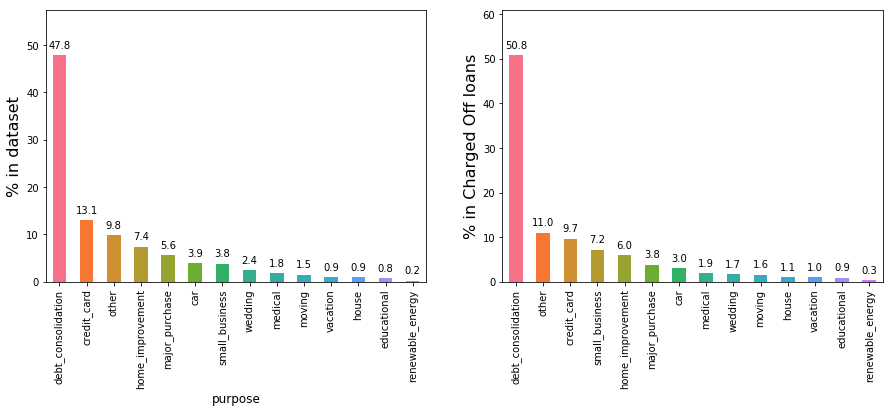

In [56]:
# Let us analyse this data based on the purpose
plt.figure(figsize=(15,5))
plot_percentages(master_loan, 'purpose')

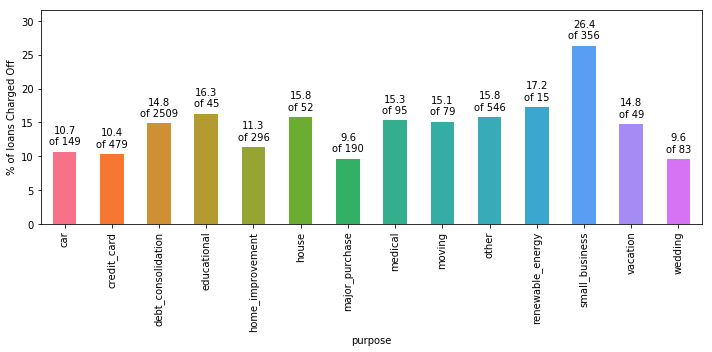

In [58]:
plt.figure(figsize=(10, 5))
plotLoanStatus(master_loan, 'purpose')

Notice that 26% of the loans given for small_business have been charged off

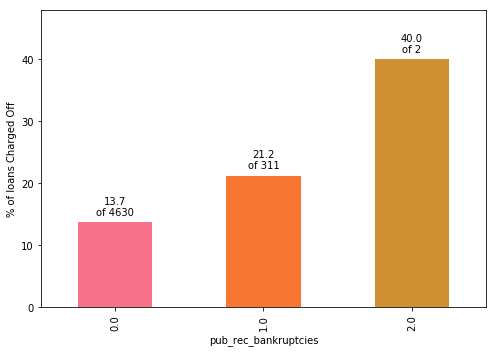

In [61]:
# Let us analyse based on previous bankruptcy filed
plt.figure(figsize=(7,5))
plotLoanStatus(master_loan, 'pub_rec_bankruptcies')

<Figure size 1080x360 with 0 Axes>

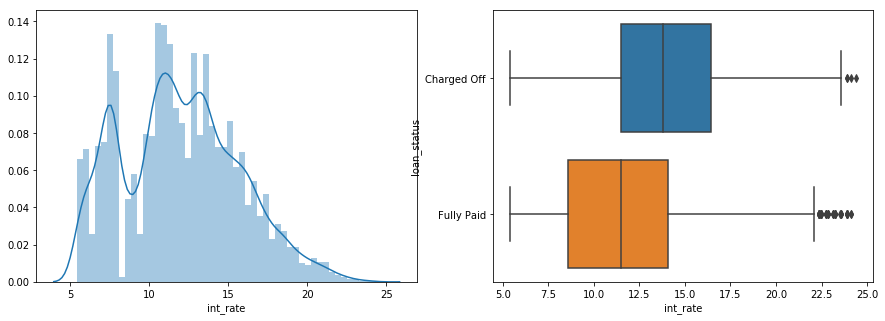

In [62]:
# Analysis based on interest rate
plt.figure(figsize=(15,5))
plot_distribution(master_loan, 'int_rate')

As the interest rates go higher the chances of the loan being charged off is very high

In [63]:
master_loan['interest_rate_buckets'] = round(master_loan['int_rate'])

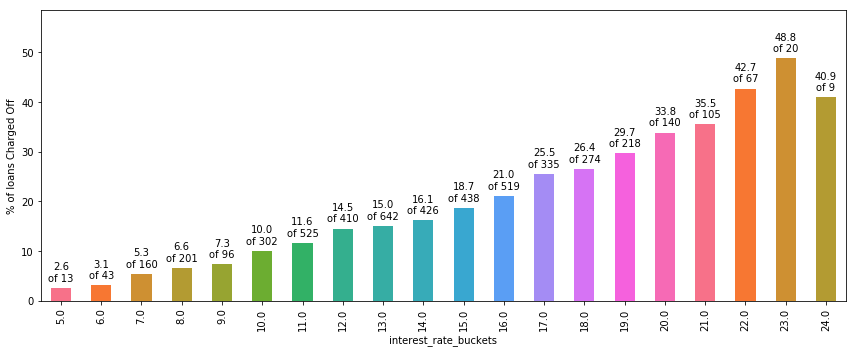

In [64]:
plt.figure(figsize=(12,5))
plotLoanStatus(master_loan, 'interest_rate_buckets')

<Figure size 1080x360 with 0 Axes>

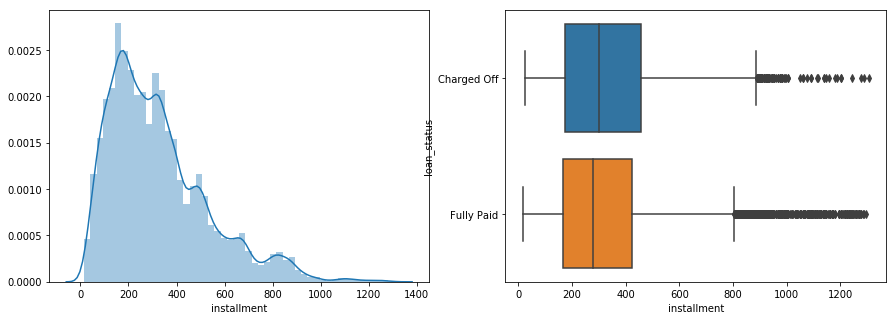

In [65]:
# Analysis based on the installment of the loan
plt.figure(figsize=(15,5))
plot_distribution(master_loan, 'installment')

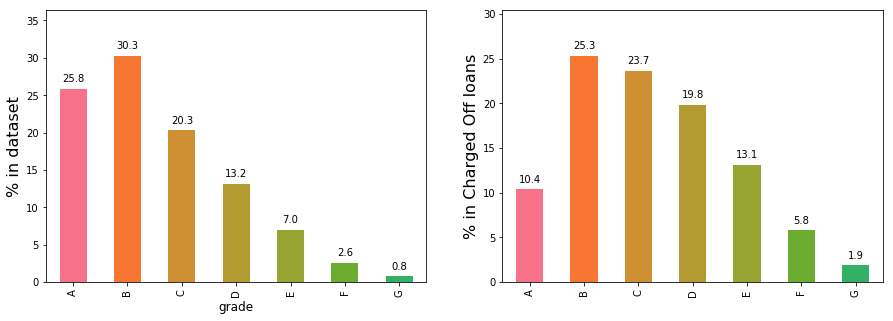

In [66]:
# Analysis based on Grade
plt.figure(figsize=(15,5))
plot_percentages(master_loan, 'grade', True)

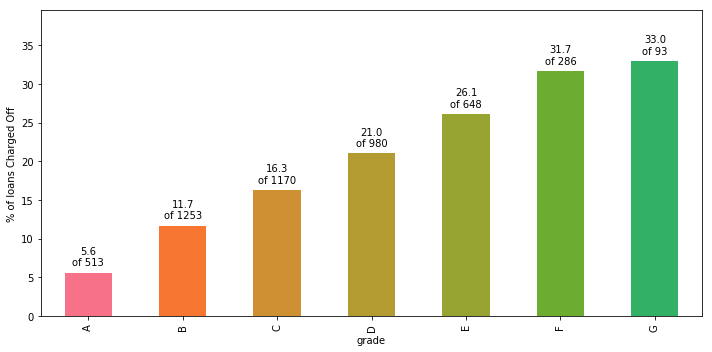

In [67]:
plt.figure(figsize=(10,5))
plotLoanStatus(master_loan, 'grade')

Loans with higher grade are more Risky

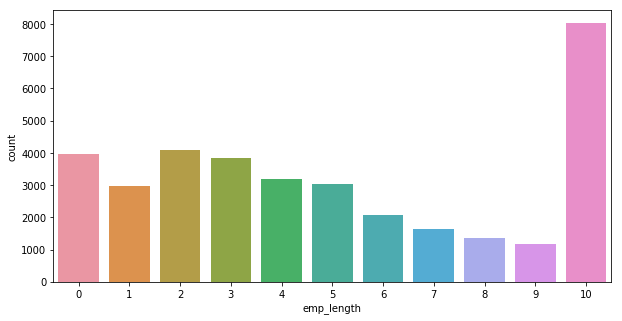

In [68]:
# Analysis based on the emp_length
plt.figure(figsize=(10,5))
sns.countplot(master_loan['emp_length'], order=sorted(master_loan.emp_length.unique()))
plt.show()

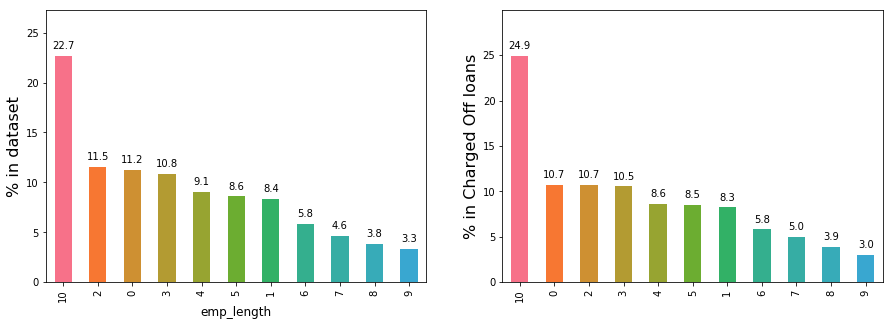

In [71]:
plt.figure(figsize=(15, 5))
plot_percentages(master_loan, 'emp_length')

In [70]:
# Create derived variable 
master_loan['dti_bin'] = pd.cut(master_loan['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])


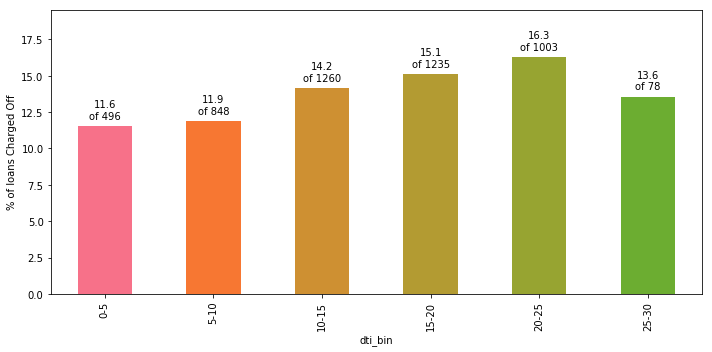

In [72]:
plt.figure(figsize=(10,5))
plotLoanStatus(master_loan, 'dti_bin')

Higher the DTI higher chances for charge off

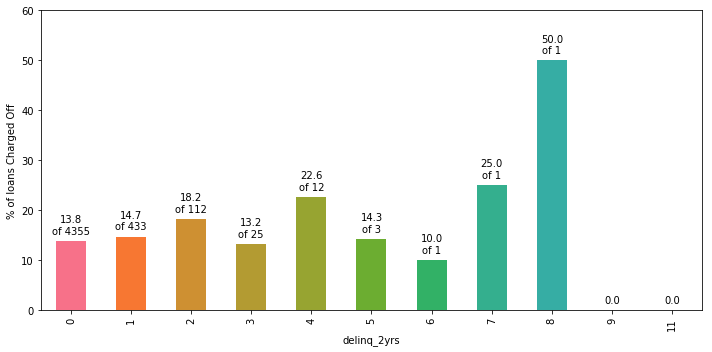

In [73]:
# Analysis based on deliquent
plt.figure(figsize=(10,5))
plotLoanStatus(master_loan, 'delinq_2yrs')

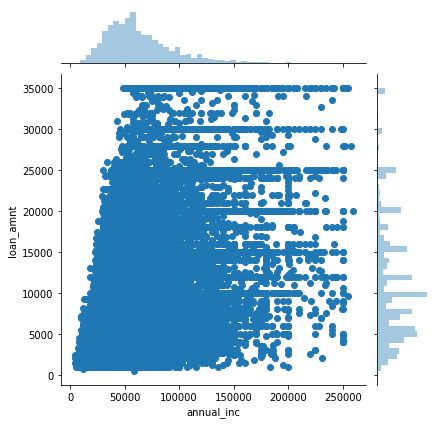

In [75]:
#Bivariate analysis based on annual income and loan amount
sns.jointplot('annual_inc', 'loan_amnt', master_loan.loc[master_loan['annual_inc']<260000])
plt.show()

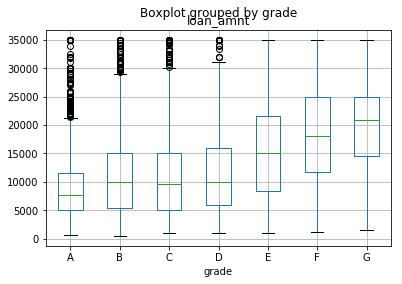

In [76]:
# Analysis on loan amount and grade
master_loan.boxplot(column='loan_amnt', by='grade')
plt.show()

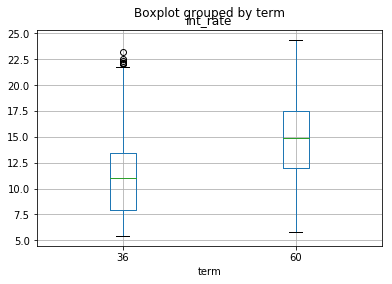

In [77]:
# Analysis on interest rate and term
master_loan.boxplot(column='int_rate', by='term')
plt.show()

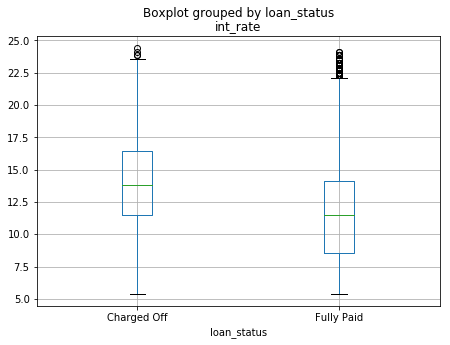

In [78]:
# Interest rate and loan status
master_loan.boxplot(column='int_rate', by='loan_status',figsize=(7,5))

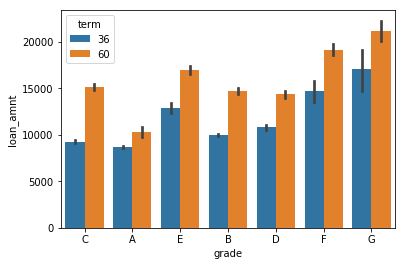

In [79]:
# Loan amount, term and grade
sns.barplot(x='grade', y='loan_amnt', hue="term", data=master_loan, estimator=np.mean)
plt.show()

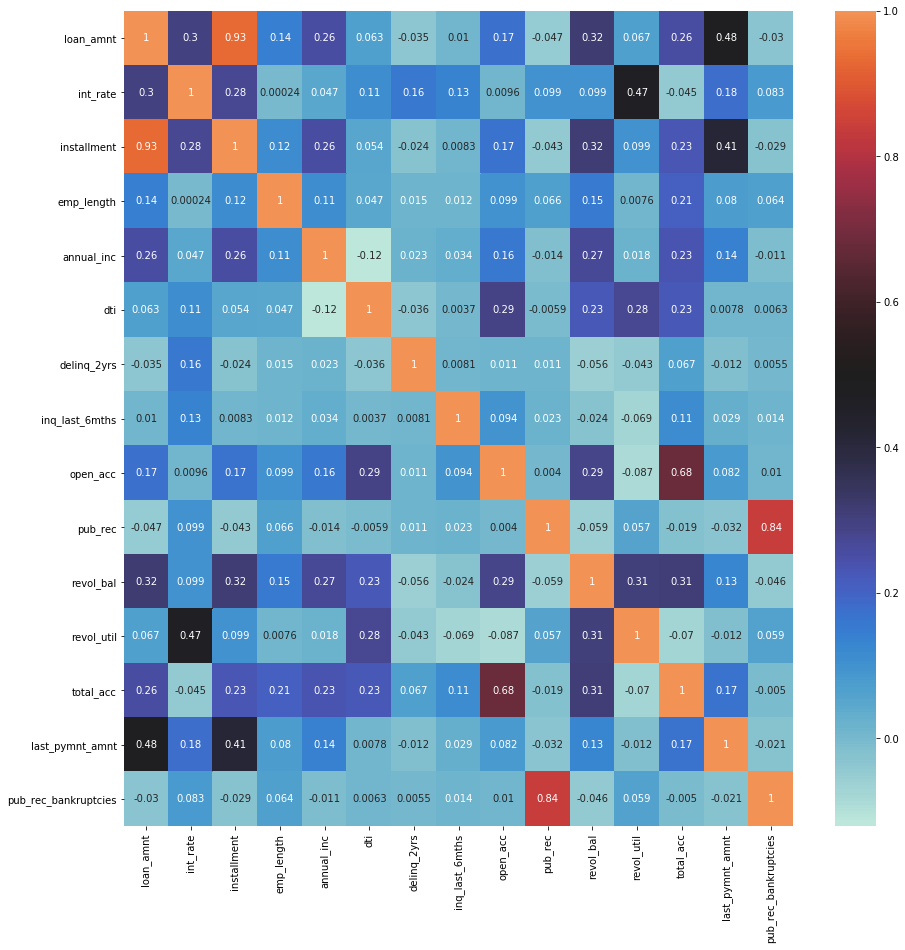

In [80]:
#Correlation heat map
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = master_loan[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

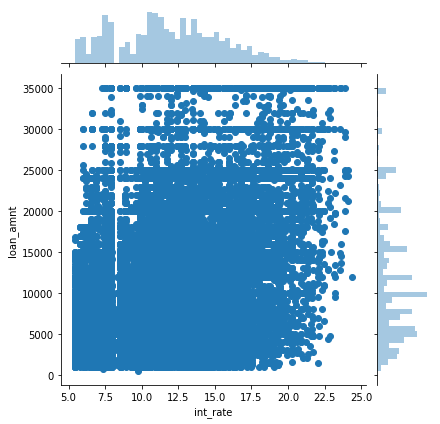

In [81]:
sns.jointplot('int_rate', 'loan_amnt', master_loan)

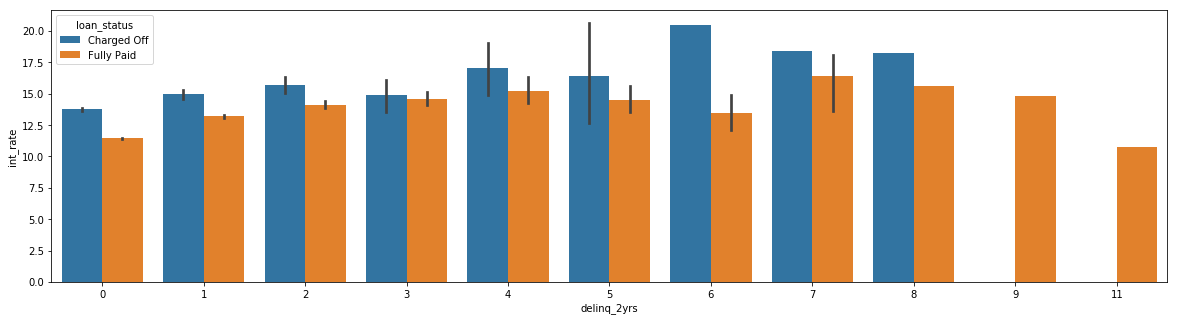

In [83]:
# delinq_2yrs vs loan status vs interest rate
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=master_loan, estimator=np.mean)
plt.show()